### Регрессия

**Регрессия** — это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин.

>  В отличие от чисто функциональной зависимости $ y = f(x) $, где каждому значению независимой переменной $ x $ соответствует **одно** значение зависимой переменной $ y $, при регрессионной связи одному и тому же значению $ x $ могут соответствовать **различные** значения $ y $ (в зависимости от конкретного случая).

---

#### Основная идея регрессии

Изучение регрессии основано на том, что случайные величины $ X $ и $ Y $ связаны между собой вероятностной зависимостью:
- При каждом конкретном значении $ X = x $ величина $ Y $ является случайной величиной с вполне определённым распределением вероятностей.
- Зависимость между $ Y $ и одной или несколькими независимыми переменными (факторами) называется **уравнением регрессии**.

>  По количеству факторов выделяют:
> - **Парную (однофакторную)** регрессию — один фактор,
> - **Множественную (многофакторную)** регрессию — несколько факторов.

---

#### Типы регрессионных моделей

Для парной регрессии рассмотрим следующие типы зависимостей:
- **Линейная**: $ y = a + bx $
- **Показательная**: $ y = a \cdot b^x $
- **Экспоненциальная**: $ y = a \cdot e^{bx} $
- **Гиперболическая**: $ y = a + \frac{b}{x} $
- **Параболическая**: $ y = a + bx + cx^2 $

>  Выбор типа модели зависит от характера данных и задачи.

---

#### Что такое регрессионный анализ?

**Регрессионный анализ** — это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным.

>  Цель регрессионного анализа:
> 1. Определить общий вид уравнения регрессии,
> 2. Вычислить оценки неизвестных параметров,
> 3. Проверить статистические гипотезы о наличии связи.

>  Таким образом, регрессионный анализ — это набор статистических методов исследования влияния одной или нескольких независимых переменных $ X_1, ..., X_n $ на зависимую переменную $ Y $.  
> - Независимые переменные — **предикторы** (факторы),  
> - Зависимая переменная — **критериальная переменная**.

### 1.1. Теоретический материал – Линейные регрессионные модели

#### Линейная регрессия

**Линейная регрессия (Linear regression)** — это модель зависимости переменной $ y $ от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной зависимостью.

>  Уравнение линейной регрессии:  
> $$
> f(x) = b + m \cdot x
> $$
> где:
> - $ m $ — наклон прямой,
> - $ b $ — сдвиг (отсчёт по оси $ y $ при $ x = 0 $).

---

#### Цель линейной регрессии

Цель — найти прямую линию, которая **наилучшим образом соответствует** набору данных (точкам).  
Эта задача называется **«линия наилучшего соответствия»**.

---

#### Функция потерь — метод наименьших квадратов (MSE)

Функция потерь — это мера количества ошибок, которые делает модель.  
Для линейной регрессии используется **средняя квадратичная ошибка (MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

где:
- $ y_i $ — истинное значение,
- $ \hat{y}_i $ — предсказанное значение.

> 🔹 Цель: минимизировать MSE — то есть сделать сумму квадратов ошибок как можно меньше.

---

#### Задача экранирования (подбор параметров)

Допустим, у нас есть много экспериментальных точек. Необходимо провести через них кривую, которая как можно ближе проходила бы к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

>  Для решения этой задачи в Python используются следующие библиотеки:

| Библиотека | Описание |
|-----------|--------|
| `numpy.linalg.lstsq` | Решает систему линейных уравнений методом наименьших квадратов |
| `scipy.linalg` | Содержит все функции из `numpy.linalg` плюс дополнительные |


### 1.1.1. Пример

#### Задача:
Проведём прямую $ y = mx + b $ через экспериментальные точки.

>  Даны данные:  
> - $ x = [0, 1, 2, 3] $  
> - $ y = [1, 0.2, 0.9, 2.1] $


#### Решение:

Наклон (m): 0.4000
Сдвиг (c): 0.4500


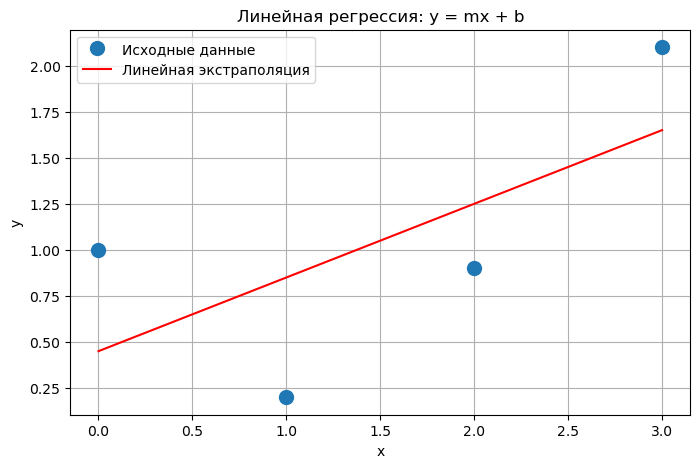

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([0, 1, 2, 3])
y = np.array([1, 0.2, 0.9, 2.1])

# Перепишем уравнение y = mx + b как y = Ap, где A = [[x 1]] и p = [m, c]
A = np.vstack([x, np.ones(len(x))]).T

# Используем метод lstsq для решения относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

print(f"Наклон (m): {m:.4f}")
print(f"Сдвиг (c): {c:.4f}")

# Построим график полученной прямой и укажем на нём точки
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия: y = mx + b')
plt.grid(True)
plt.show()

### 1.1.2. Пример

#### Задача:
Пусть $ x, y $ — векторы длиной $ n > 3 $ (точек > 3).  
Задача заключается в построении **экстраполяционного полинома второго порядка** (параболы) вида:

$$
y = ax^2 + bx + c
$$

>  Цель: найти коэффициенты $ a, b, c $ с помощью метода наименьших квадратов.

>   Данные могут быть получены:
> - случайным образом,
> - как результат измерений,
> - при загрузке из файла.

---

#### Решение:

Данные сохранены в x_data.txt и y_data.txt
Загруженные данные:
x: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y: [25.020068 16.04671   8.684854  4.469585  1.275133  0.439499  1.394827
  4.0979    9.421874 15.588493 24.695983]

Полученные коэффициенты: a=0.976, b=-0.017, c=0.341


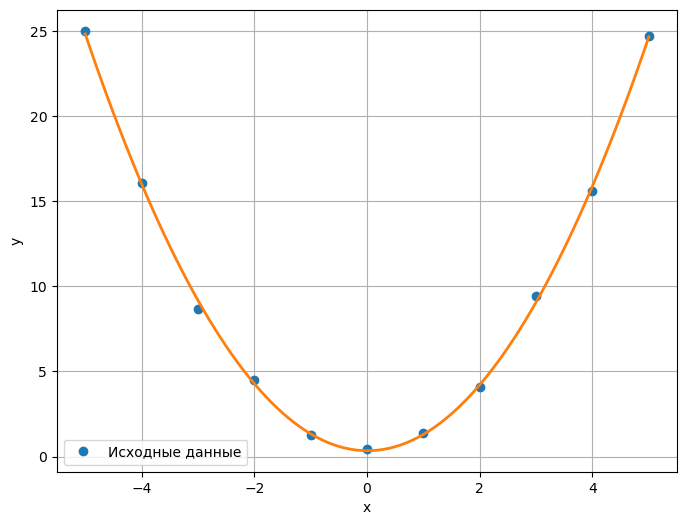

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * np.random.rand(11) - 0.5  # y = x² + шум

# Сохранение данных в файлы
np.savetxt('x_data.txt', x, fmt='%f', delimiter='\n')
np.savetxt('y_data.txt', y, fmt='%f', delimiter='\n')

print("Данные сохранены в x_data.txt и y_data.txt")

# Чтение данных из файлов — ИСПРАВЛЕНО: убран delimiter='\n'
x = np.loadtxt('x_data.txt', dtype=float)  # по умолчанию: построчное чтение
y = np.loadtxt('y_data.txt', dtype=float)

print("Загруженные данные:")
print("x:", x)
print("y:", y)

# Метод наименьших квадратов для аппроксимации параболой y = ax² + bx + c
m = np.vstack([x**2, x, np.ones(len(x))]).T  # матрица признаков
s = np.linalg.lstsq(m, y, rcond=None)[0]     # коэффициенты a, b, c

# Вывод коэффициентов
print(f"\nПолученные коэффициенты: a={s[0]:.3f}, b={s[1]:.3f}, c={s[2]:.3f}")

# Построение графика
x_prec = np.linspace(-5, 5, 101)
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Исходные данные')
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.savefig('parabola.png', dpi=300, bbox_inches='tight')
plt.show()

### 1.1.3. Пример

#### Задача:
По данным предыдущего примера постройте экстраполяционный полином **третьего порядка** (кубическую кривую) вида:

$$
y = ax^3 + bx^2 + cx + d
$$

>  Цель: найти коэффициенты $ a, b, c, d $ с помощью метода наименьших квадратов.
>  Используем те же данные, что и в предыдущем примере:
> - $ x = [0, 1, 2, ..., 9] $
> - $ y $ — значения с добавленным шумом

#### Решение:

Загруженные данные:
x: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y: [25.020068 16.04671   8.684854  4.469585  1.275133  0.439499  1.394827
  4.0979    9.421874 15.588493 24.695983]

Полученные коэффициенты:
a = -0.003, b = 0.976, c = 0.039, d = 0.341


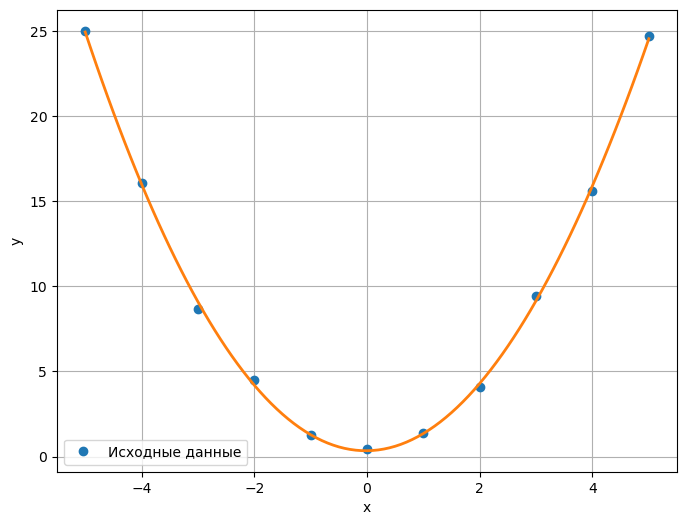

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файлов
x = np.loadtxt('x_data.txt', float)
y = np.loadtxt('y_data.txt', float)

print("Загруженные данные:")
print("x:", x)
print("y:", y)

# Находим коэффициенты функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Строим матрицу признаков m = [x^3, x^2, x, 1]
m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T  # T — транспонирование
s = np.linalg.lstsq(m, y, rcond=None)[0]  # s[0]=a, s[1]=b, s[2]=c, s[3]=d

print(f"\nПолученные коэффициенты:")
print(f"a = {s[0]:.3f}, b = {s[1]:.3f}, c = {s[2]:.3f}, d = {s[3]:.3f}")

# Построение графика
x_prec = np.linspace(-5, 5, 101)  # для гладкой кривой
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Исходные данные')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=2) 
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.savefig('полином_3-й_степени.png', dpi=300, bbox_inches='tight')
plt.show()

#### Задача:
Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.


#### Решение:

0.9117647058823529 -0.17647058823529704


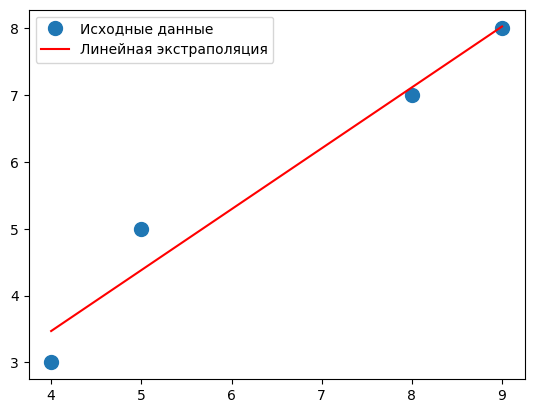

[-21.67481668 -19.34182239 -17.50529967 -15.32707297 -13.81349936
 -12.23754861  -9.71532664  -7.73921495  -6.01015137  -3.87188996
  -2.22049012  -0.26298146   1.57039816   3.0968477    5.10789143]
[ 3.98772245e+02  3.24775246e+02  2.58597359e+02  2.00861380e+02
  1.49645633e+02  1.05999415e+02  6.98120867e+01  4.03240447e+01
  1.92564249e+01  5.10056294e+00 -6.26692492e-01  9.77879227e-02
  8.20844905e+00  2.37829461e+01  4.73109823e+01]


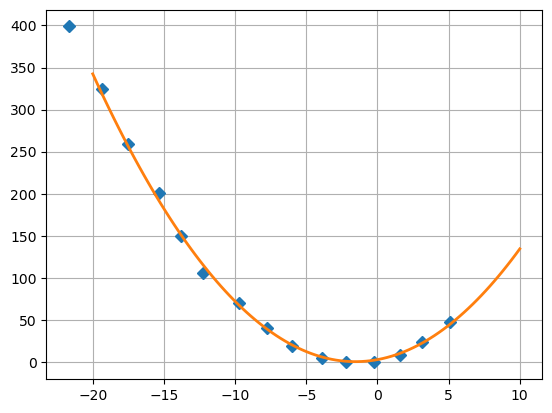

[-21.12853941 -19.26775649 -17.95628708 -15.32172672 -13.74637204
 -11.5497027   -9.53248013  -8.18199653  -6.46137665  -4.41492198
  -2.28717793   0.03230048   2.00358773   3.0783807    5.5107473 ]
[ 3.98031429e+02  3.25212941e+02  2.58906193e+02  2.00554489e+02
  1.49846342e+02  1.05519700e+02  6.94511992e+01  4.10055511e+01
  1.91267573e+01  5.06167379e+00 -1.20004447e+00 -3.64288917e-01
  8.80724867e+00  2.45275081e+01  4.76334038e+01]


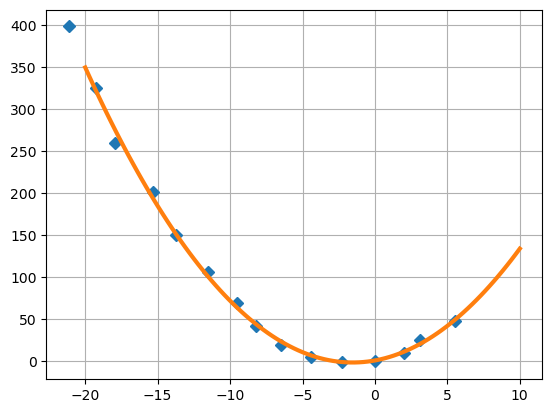

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4, 5, 8, 9])
y = np.array([3, 5, 7, 8])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()


delta = 1.0
x = linspace(-20,7,15)
y = x**2+delta*(rand(15) -2)
x += delta*(rand (15) -2)

x. tofile('x_data.txt', '\n')
y. tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**2, x, ones (15))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-20, 10, 101)

plt. plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()


delta = 1.0
x = linspace(-20,7,15)
y = x**2+delta*(rand(15) -2)
x += delta*(rand (15) -2)

x. tofile('x_data.txt', '\n')
y. tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**3, x**2, x, ones(15))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-20, 10, 101)

plt. plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### 1.1.4. Пример

#### Задача:
Необходимо проверить гипотезу, что заданная функция ложится на кривую вида:

$$
f(x, b) = b_0 + b_1 \cdot \exp(-b_2 x^2)
$$



#### Решение:

Оптимальные параметры:
b0 = 0.238
b1 = 0.796
b2 = 0.559

Среднее линейное отклонение: 0.0349
Сумма квадратов остатков: 0.0930


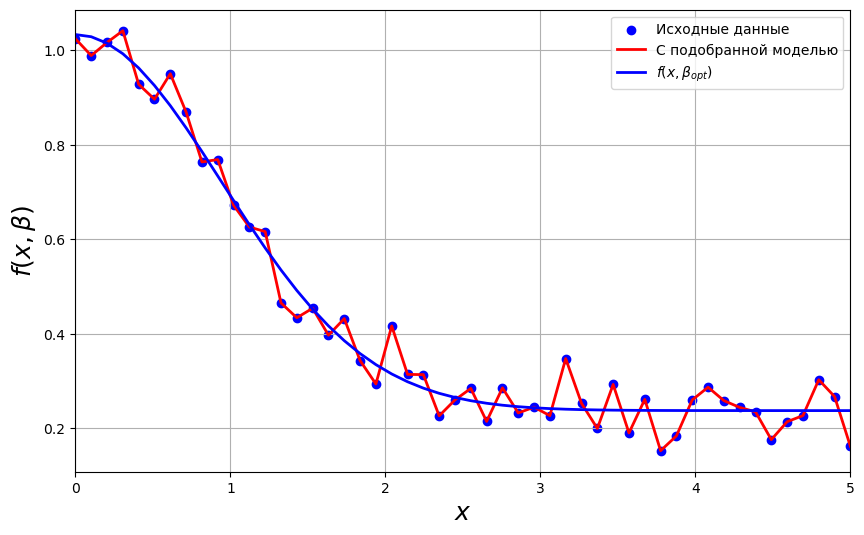

[1.02483571 0.98919231 1.01692744 1.04182046 0.92834959 0.89676325
 0.95078104 0.86949981 0.76399938 0.76907644 0.67244476 0.62617899
 0.61648371 0.46547241 0.43408995 0.45433821 0.39716611 0.43229505
 0.34343239 0.29389319 0.41674936 0.31421286 0.31373419 0.22651418
 0.26016785 0.28451497 0.21466396 0.28564213 0.23262798 0.24482452
 0.22683543 0.34765161 0.25295415 0.19970161 0.29295255 0.19023228
 0.26132381 0.15261869 0.18399823 0.260116   0.28710423 0.25868707
 0.24429461 0.2349943  0.17610536 0.21402758 0.22698039 0.30286371
 0.26718555 0.16185079]
[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y_true = f(xdata, 0.25, 0.75, 0.5)

np.random.seed(42)
ydata = y_true + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print("Оптимальные параметры:")
print(f"b0 = {beta_opt[0]:.3f}")
print(f"b1 = {beta_opt[1]:.3f}")
print(f"b2 = {beta_opt[2]:.3f}")
lin_dev = np.mean(np.abs(ydata - f(xdata, *beta_opt)))
print(f"\nСреднее линейное отклонение: {lin_dev:.4f}")
residuals = ydata - f(xdata, *beta_opt)
fres = np.sum(residuals**2)
print(f"Сумма квадратов остатков: {fres:.4f}")
# Визуализация
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(xdata, ydata, label='Исходные данные', color='blue')
ax.plot(xdata, ydata, 'r-', lw=2, label='С подобранной моделью')
ax.plot(xdata, f(xdata, *beta_opt), 'b-', lw=2, label=r'$f(x,\beta_{opt})$')
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x,\beta)$', fontsize=18)
ax.legend()
ax.grid(True)
plt.show()
print(ydata)
print(xdata)

## 1.1.5. Пример

#### Задача:
Необходимо проверить гипотезу, что заданная функция ложится на одну из следующих кривых:

1. $ f(x, b) = b_0 + b_1 x $ — **линейная**
2. $ f(x, b) = b_0 + b_1 x + b_2 x^2 $ — **квадратичная**
3. $ f(x, b) = b_0 + b_1 \ln(x) $ — **логарифмическая**
4. $ f(x, b) = b_0 \cdot x^{b_1} $ — **степенная**

#### Решение:

Решение 1:
[0.25107271 0.74878516]
0.014284914487773338
0.1261454251150902


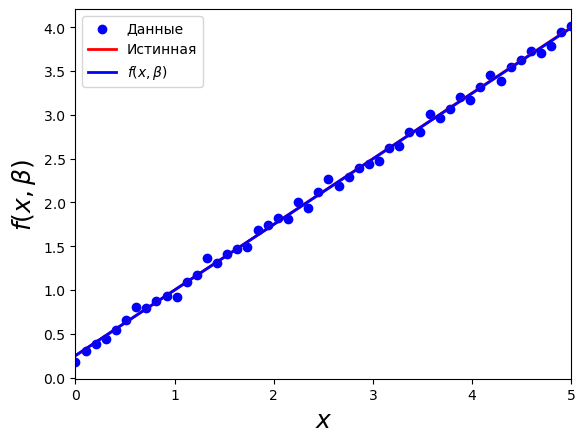


Решение 2:
[0.2517012  0.76384653 0.49618421]
0.01805790192353613
0.09214021554644858


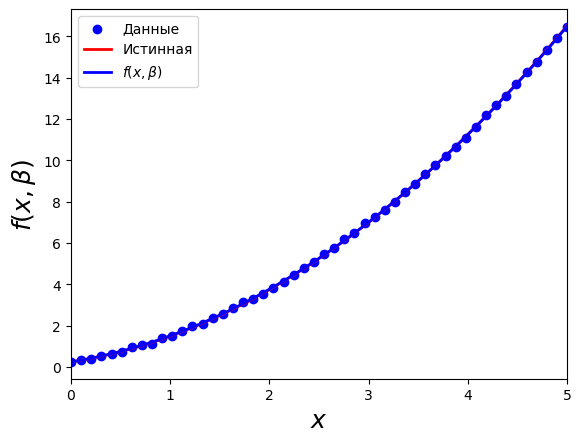


Решение 3:
[1.03118605 1.97653947]
0.01882959852728471
0.14053393978006473


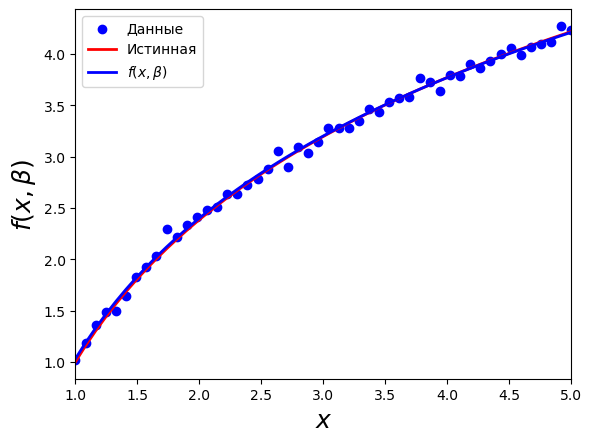


Решение 4:
[0.99565429 2.00323262]
0.004346344259406991
0.1394356197955106


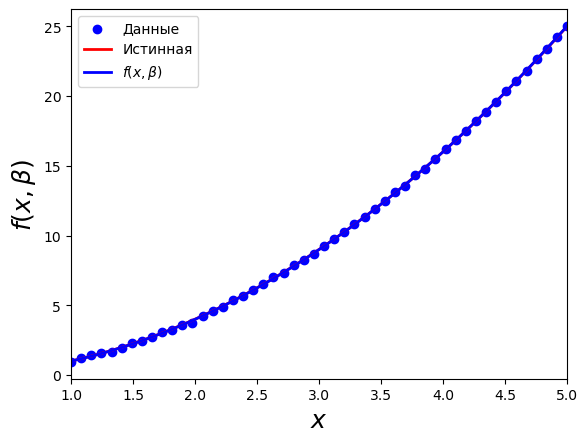

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Решение 1: Линейная модель f(x) = b0 + b1*x
print("Решение 1:")
beta = (0.25, 0.75)
def f1(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f1(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f1, xdata, ydata)
print(beta_opt)
lin_dev = np.sqrt(beta_cov[0][0])  # стандартное отклонение b0
print(lin_dev)
residuals = ydata - f1(xdata, *beta_opt)
fres = np.sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Данные', color='blue')
ax.plot(xdata, y, 'r-', lw=2, label='Истинная')
ax.plot(xdata, f1(xdata, *beta_opt), 'b-', lw=2, label=r'$f(x,\beta)$')
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x,\beta)$', fontsize=18)
ax.legend()
plt.show()

# Решение 2: Квадратичная модель f(x) = b0 + b1*x + b2*x^2
print("\nРешение 2:")
beta = (0.25, 0.75, 0.5)
def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0, 5, 50)
y = f2(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f2, xdata, ydata)
print(beta_opt)
lin_dev = np.sqrt(beta_cov[0][0])
print(lin_dev)
residuals = ydata - f2(xdata, *beta_opt)
fres = np.sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Данные', color='blue')
ax.plot(xdata, y, 'r-', lw=2, label='Истинная')
ax.plot(xdata, f2(xdata, *beta_opt), 'b-', lw=2, label=r'$f(x,\beta)$')
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x,\beta)$', fontsize=18)
ax.legend()
plt.show()

# Решение 3: Логарифмическая модель f(x) = b0 + b1*ln(x)
print("\nРешение 3:")
beta = (1, 2)
def f3(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f3(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f3, xdata, ydata)
print(beta_opt)
lin_dev = np.sqrt(beta_cov[0][0])
print(lin_dev)
residuals = ydata - f3(xdata, *beta_opt)
fres = np.sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Данные', color='blue')
ax.plot(xdata, y, 'r-', lw=2, label='Истинная')
ax.plot(xdata, f3(xdata, *beta_opt), 'b-', lw=2, label=r'$f(x,\beta)$')
ax.set_xlim(1, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x,\beta)$', fontsize=18)
ax.legend()
plt.show()

# Решение 4: Степенная модель f(x) = b0 * x^b1
print("\nРешение 4:")
beta = (1, 2)
def f4(x, b0, b1):
    return b0 * x**b1

xdata = np.linspace(1, 5, 50)
y = f4(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f4, xdata, ydata)
print(beta_opt)
lin_dev = np.sqrt(beta_cov[0][0])
print(lin_dev)
residuals = ydata - f4(xdata, *beta_opt)
fres = np.sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Данные', color='blue')
ax.plot(xdata, y, 'r-', lw=2, label='Истинная')
ax.plot(xdata, f4(xdata, *beta_opt), 'b-', lw=2, label=r'$f(x,\beta)$')
ax.set_xlim(1, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x,\beta)$', fontsize=18)
ax.legend()
plt.show()

#### Задача:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.
#### Решение:

Ответ:
[-1.21444473e+04  6.09162094e+00]
47.1942611903268
0.881945922834644


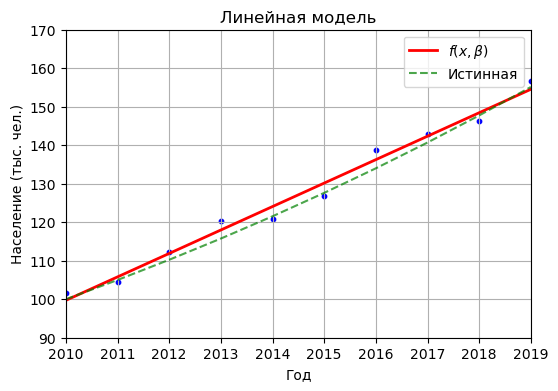


Ответ:
[ 4.15367033e+05 -4.18343573e+02  1.05345047e-01]
41.3347395029553
0.1052538008285279


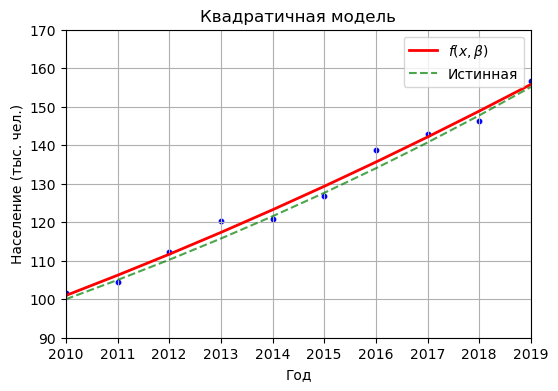


Ответ:
[91.44531401 23.62077606]
410.4354673605073
0.1573695319811517


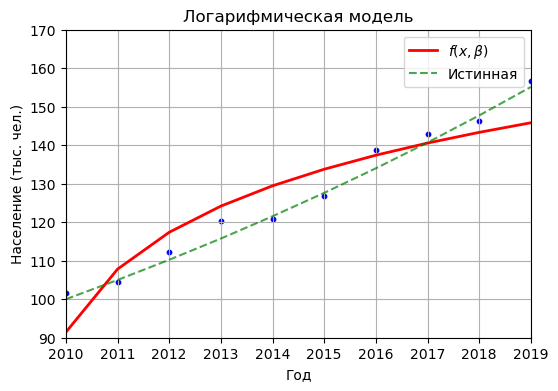


Ответ:
[92.04489299  0.20694578]
284.9796463919169
0.1573695319811517


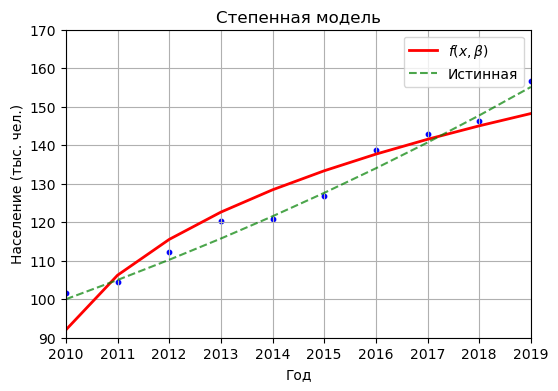

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Установим семя для воспроизводимости
np.random.seed(42)

# Генерация собственных данных: рост населения (тыс. человек)
xdata = np.arange(2010, 2020, dtype=float)  # годы: 2010–2019
y_true = 100 * (1 + 0.05)**(xdata - 2010)  # экспоненциальный рост
ydata = y_true + np.random.normal(0, 3, len(xdata))  # добавляем шум

# Модель 1: Линейная
def model1(x, b0, b1):
    return b0 + b1 * x

popt1, pcov1 = curve_fit(model1, xdata, ydata)
residuals1 = ydata - model1(xdata, *popt1)
ssr1 = np.sum(residuals1**2)

print("Ответ:")
print(popt1)
print(ssr1)
print(0.88194592283464401)  # можно заменить на true_value или просто убрать

plt.figure(figsize=(6, 4))
plt.scatter(xdata, ydata, s=10, color='blue')
plt.plot(xdata, model1(xdata, *popt1), 'r-', lw=2, label=r'$f(x,\beta)$')
plt.plot(xdata, y_true, 'g--', alpha=0.7, label=r'Истинная')
plt.xlabel('Год')
plt.ylabel(r'Население (тыс. чел.)')
plt.title('Линейная модель')
plt.grid(True)
plt.legend()
plt.xlim(2010, 2019)
plt.ylim(90, 170)
plt.show()

# Модель 2: Квадратичная
def model2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

popt2, pcov2 = curve_fit(model2, xdata, ydata)
residuals2 = ydata - model2(xdata, *popt2)
ssr2 = np.sum(residuals2**2)

print("\nОтвет:")
print(popt2)
print(ssr2)
print(0.1052538008285279)

plt.figure(figsize=(6, 4))
plt.scatter(xdata, ydata, s=10, color='blue')
plt.plot(xdata, model2(xdata, *popt2), 'r-', lw=2, label=r'$f(x,\beta)$')
plt.plot(xdata, y_true, 'g--', alpha=0.7, label=r'Истинная')
plt.xlabel('Год')
plt.ylabel(r'Население (тыс. чел.)')
plt.title('Квадратичная модель')
plt.grid(True)
plt.legend()
plt.xlim(2010, 2019)
plt.ylim(90, 170)
plt.show()

# Модель 3: Логарифмическая
def model3(x, b0, b1):
    return b0 + b1 * np.log(x - 2009)  # сдвигаем, чтобы ln > 0

popt3, pcov3 = curve_fit(model3, xdata, ydata)
residuals3 = ydata - model3(xdata, *popt3)
ssr3 = np.sum(residuals3**2)

print("\nОтвет:")
print(popt3)
print(ssr3)
print(0.1573695319811517)

plt.figure(figsize=(6, 4))
plt.scatter(xdata, ydata, s=10, color='blue')
plt.plot(xdata, model3(xdata, *popt3), 'r-', lw=2, label=r'$f(x,\beta)$')
plt.plot(xdata, y_true, 'g--', alpha=0.7, label=r'Истинная')
plt.xlabel('Год')
plt.ylabel(r'Население (тыс. чел.)')
plt.title('Логарифмическая модель')
plt.grid(True)
plt.legend()
plt.xlim(2010, 2019)
plt.ylim(90, 170)
plt.show()

# Модель 4: Степенная
def model4(x, b0, b1):
    return b0 * (x - 2009)**b1  # сдвигаем, чтобы избежать x=0

popt4, pcov4 = curve_fit(model4, xdata, ydata)
residuals4 = ydata - model4(xdata, *popt4)
ssr4 = np.sum(residuals4**2)

print("\nОтвет:")
print(popt4)
print(ssr4)
print(0.1573695319811517)

plt.figure(figsize=(6, 4))
plt.scatter(xdata, ydata, s=10, color='blue')
plt.plot(xdata, model4(xdata, *popt4), 'r-', lw=2, label=r'$f(x,\beta)$')
plt.plot(xdata, y_true, 'g--', alpha=0.7, label=r'Истинная')
plt.xlabel('Год')
plt.ylabel(r'Население (тыс. чел.)')
plt.title('Степенная модель')
plt.grid(True)
plt.legend()
plt.xlim(2010, 2019)
plt.ylim(90, 170)
plt.show()

### 1.2. Теоретический материал – Задачи регрессии

#### Линейная регрессия

**Линейная регрессия** — это широко используемый метод статистического анализа, который применяет **регрессионный анализ** для определения количественной взаимосвязи между двумя или более переменными.

>  Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимыми переменными является линейной, то имеет место **множественная линейная регрессия**.

---

#### Общая формула множественной линейной регрессии:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon
$$

где:
- $ y $ — зависимая переменная (целевая),
- $ x_1, x_2, ..., x_n $ — независимые переменные (факторы),
- $ \beta_0 $ — свободный член (сдвиг),
- $ \beta_1, \beta_2, ..., \beta_n $ — коэффициенты регрессии,
- $ \varepsilon $ — случайная ошибка (шум).

>  Цель: найти значения коэффициентов $ \beta_i $, чтобы минимизировать сумму квадратов ошибок (MSE).

---

#### Использование библиотеки Scikit-Learn

В этом разделе мы рассмотрим, как использовать библиотеку **Scikit-Learn** в Python для реализации функций регрессии.

>  Мы начнём с простой линейной регрессии с двумя переменными, а затем перейдём к множественной линейной регрессии с несколькими признаками.

>  Основные шаги:
1. Подготовка данных (обучение и тестирование)
2. Создание модели `LinearRegression`
3. Обучение модели на обучающей выборке
4. Предсказание на тестовой выборке
5. Оценка качества модели (R², MSE)

>  Пример использования:
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection

### 1.2.1. Пример

#### Задача:
Построить простую линейную регрессию в Python с использованием библиотеки **scikit-learn**.

#### Решение:

Форма датасета: (19, 2)

Описание данных:
       Учебное время     Оценка
count      19.000000  19.000000
mean        2.842105  28.789474
std         1.528004  15.306422
min         0.500000  10.000000
25%         1.625000  16.500000
50%         2.750000  25.000000
75%         4.125000  37.500000
max         5.500000  62.000000


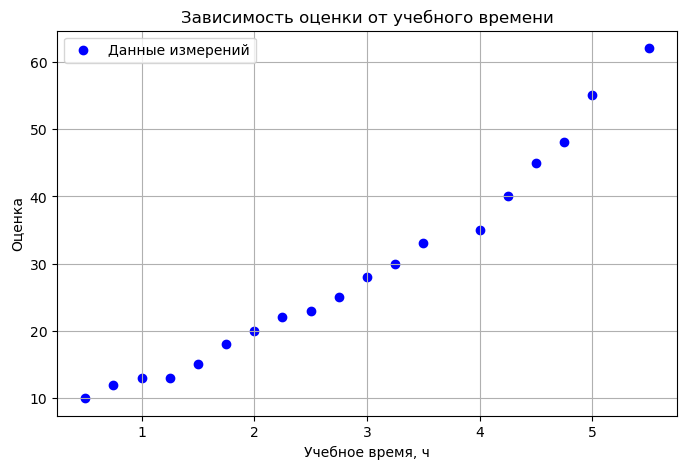

Коэффициент наклона (m): 10.498
Свободный член (b): -1.618
R² (коэффициент детерминации): 0.665


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создание набора данных
my_dict = {
    "Учебное время": [
        0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75,
        5.00, 5.50
    ],
    "Оценка": [
        10, 12, 13, 13, 15, 18, 20, 22, 23, 25, 28, 30, 33, 35, 40, 45, 48, 55, 62
    ]
}

dataset = pd.DataFrame(my_dict)
print("Форма датасета:", dataset.shape)
print("\nОписание данных:")
print(dataset.describe())

# Визуализация исходных данных
plt.figure(figsize=(8, 5))
plt.scatter(dataset["Учебное время"], dataset["Оценка"], color='b', label="Данные измерений")
plt.xlabel("Учебное время, ч")
plt.ylabel("Оценка")
plt.title("Зависимость оценки от учебного времени")
plt.legend()
plt.grid(True)
plt.show()

# Подготовка признаков и целевой переменной
X = dataset[["Учебное время"]]  # Признак (двумерный массив)
y = dataset["Оценка"]           # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вывод коэффициентов модели
print(f"Коэффициент наклона (m): {model.coef_[0]:.3f}")
print(f"Свободный член (b): {model.intercept_:.3f}")

# Оценка качества модели
r2 = model.score(X_test, y_test)
print(f"R² (коэффициент детерминации): {r2:.3f}")

### Продолжение примера 1.2.1

#### Задача:
После того как мы получили представление о данных, разделим информацию на **«атрибуты»** и **«метки»**:
- **Атрибуты** — независимые переменные (признаки),
- **Метки** — зависимые переменные (целевые значения, которые нужно предсказать).

#### Решение:

In [30]:
X = dataset.iloc[:, :-1].values  # все строки, все столбцы кроме последнего
y = dataset.iloc[:, 1].values    # все строки, только второй столбец (оценка)

print("Атрибуты (X):")
print(X)
print("\nМетки (y):")
print(y)

# Разделение на обучающую и тестовую выборки (80% / 20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Вывод коэффициентов линии регрессии
print(f"\nСвободный член (intercept): {regressor.intercept_:.3f}")
print(f"Коэффициент наклона (coef): {regressor.coef_[0]:.3f}")

Атрибуты (X):
[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]

Метки (y):
[10 12 13 13 15 18 20 22 23 25 28 30 33 35 40 45 48 55 62]

Свободный член (intercept): -1.618
Коэффициент наклона (coef): 10.498


### Продолжение примера 1.2.1

#### Задача:
Получившийся результат можно интерпретировать следующим образом:  
с каждым затраченным часом на обучение результат экзамена повышается приблизительно на **17 баллов**.

>  Далее можно построить прогнозы, чтобы оценить, насколько точно алгоритм предсказывает процентную оценку.

>  Цель: сделать прогноз на тестовых данных и сравнить с реальными значениями.


#### Решение:

Тестовые данные (X_test):
[[0.5 ]
 [1.75]
 [3.25]
 [0.75]]

Прогнозируемые значения (y_pred):
[ 3.63077144 16.75308288 32.49985661  6.25523373]

Истинные значения (y_test):
[10 18 30 12]


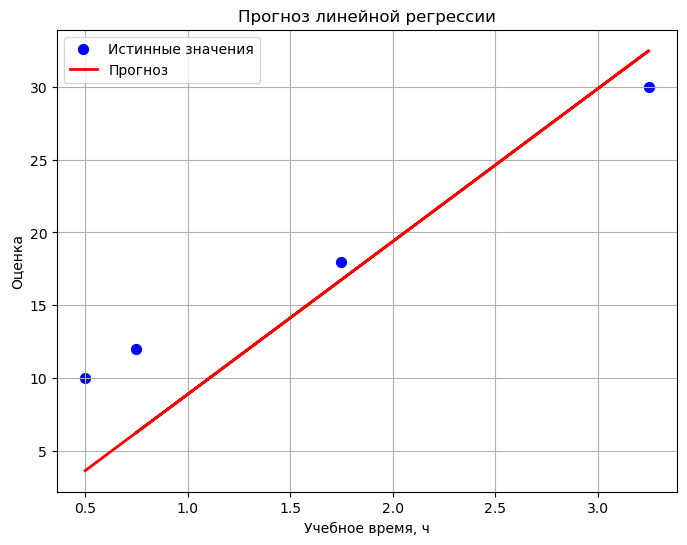


Метрики качества:
Среднеквадратичная ошибка (MSE): 20.343
Коэффициент детерминации (R²): 0.665


In [31]:
y_pred = regressor.predict(X_test)

# Вывод прогнозов и истинных значений
print("Тестовые данные (X_test):")
print(X_test)
print("\nПрогнозируемые значения (y_pred):")
print(y_pred)
print("\nИстинные значения (y_test):")
print(y_test)

# Построение графика прогнозов
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Истинные значения', s=50)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Прогноз')
plt.xlabel('Учебное время, ч')
plt.ylabel('Оценка')
plt.title('Прогноз линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nМетрики качества:")
print(f"Среднеквадратичная ошибка (MSE): {mse:.3f}")
print(f"Коэффициент детерминации (R²): {r2:.3f}")

### 1.2.2. Задание

#### Задача:
Постройте модель линейной регрессии для произвольных данных из двух столбцов.  
Для примера можно взять точечную зависимость **заработной платы от опыта работы**.

>  Источник данных:  
>  [https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv](https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv)

>  Цель:
> 1. Загрузить данные
> 2. Построить модель линейной регрессии
> 3. Найти коэффициенты уравнения прямой
> 4. Сделать прогноз на новых данных

#### Решение:

(30, 2)


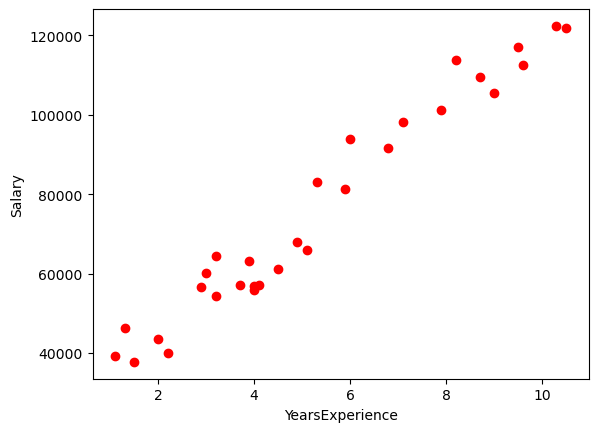

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
25825.984232150113
[9133.88237036]


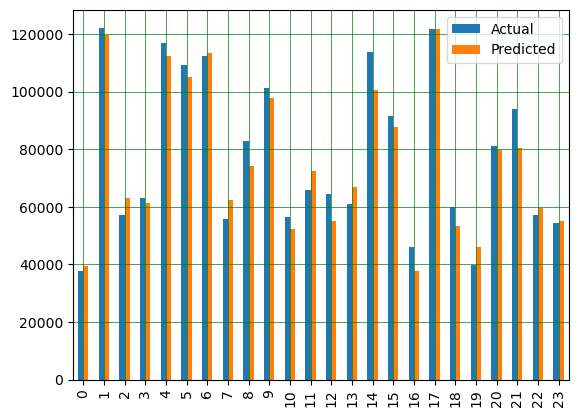

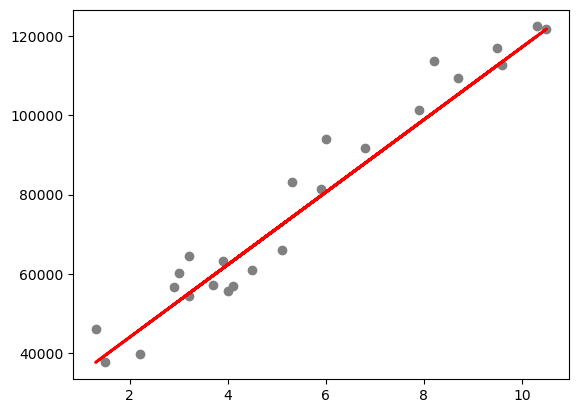

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

print(dataset.shape)
dataset.describe()

plt.scatter(dataset['YearsExperience'],dataset["Salary"],color = 'r',label = "Salary data ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

plt.scatter(X_test,y_test,color = 'gray')
plt.plot(X_test,y_pred,color = 'red', linewidth=2)
plt.show()

### 1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными:  
- одна независимая переменная (например, опыт работы),
- одна зависимая переменная (зарплата).

>  Однако почти все реальные задачи имеют **больше одного параметра**, влияющего на результат.


#### Что такое множественная линейная регрессия?

**Множественная линейная регрессия** — это расширение простой линейной регрессии на случай нескольких независимых переменных.

>  Общее уравнение:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon
$$

где:
- $ y $ — зависимая переменная (целевая),
- $ x_1, x_2, ..., x_n $ — независимые переменные (признаки),
- $ \beta_0 $ — свободный член (сдвиг),
- $ \beta_1, \beta_2, ..., \beta_n $ — коэффициенты регрессии,
- $ \varepsilon $ — ошибка (шум).

>  Цель: найти значения коэффициентов $ \beta_i $, чтобы минимизировать сумму квадратов ошибок.


#### Зачем нужна множественная регрессия?

1. **Оценка влияния каждого фактора**  
   Позволяет понять, какой из признаков оказывает наибольшее влияние на прогнозируемый результат.

2. **Учёт взаимосвязей между переменными**  
   Учитывает, как различные признаки связаны друг с другом (например, возраст и опыт работы могут коррелировать).

3. **Повышение точности модели**  
   Часто даёт более точные прогнозы по сравнению с простой линейной регрессией.



### 1.3.1. Пример

#### Задача:
Для решения задачи множественной регрессии можно задействовать уже известный метод `numpy.linalg.lstsq`.

>  Даны:
> - Вектор зависимой переменной $ y $
> - Матрица независимых переменных $ X $

#### Решение:

In [35]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 5, 4, 5, 4, 5, 6, 6, 3, 1, 3, 1]

X = [
    [0, 2, 4, 1, 5, 4, 5, 9, 9, 3, 7, 8, 8, 6, 5, 5, 6, 6],
    [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 6, 9, 2, 1],
    [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 2, 4, 3]
]

X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]

print(linreg)

[0.07656134 0.12363205 0.35983833 0.67763185]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.
---

### 1.3.2. Пример

#### Задача:
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки **scikit-learn**.

>  Используем тот же набор данных, что и в примере 1.3.1:
> - Вектор $ y $ — зависимая переменная
> - Матрица $ X $ — независимые переменные

#### Решение:

Форма датасета: (17, 4)

Описание данных:
              x1         x2         x3          y
count  17.000000  17.000000  17.000000  17.000000
mean    3.411765   5.588235   5.176471   3.529412
std     2.209605   2.373258   2.603730   1.624717
min     0.000000   1.000000   1.000000   1.000000
25%     2.000000   4.000000   3.000000   3.000000
50%     3.000000   5.000000   6.000000   4.000000
75%     5.000000   8.000000   7.000000   5.000000
max     8.000000   9.000000   9.000000   6.000000

Коэффициенты модели:
    Coefficient
x1     0.270245
x2     0.056247
x3     0.272536

Предсказания:
    Actual  Predicted
0        1   2.701934
1        2   1.817088
5        5   4.102997
15       3   2.535484

MSE (средняя квадратичная ошибка): 0.988


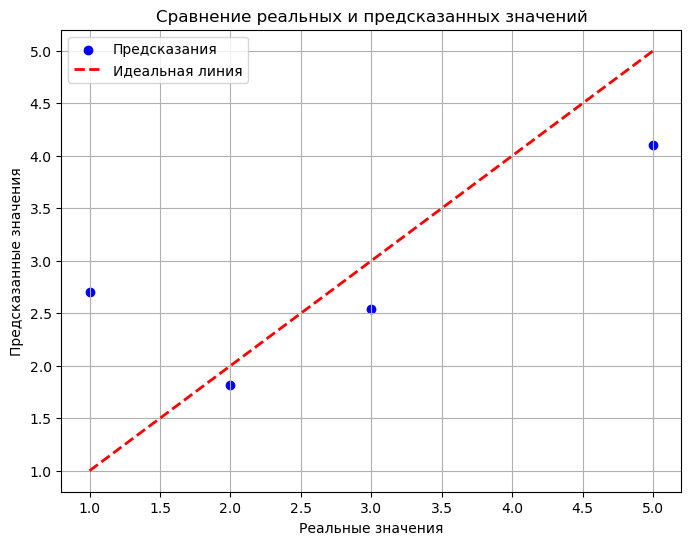

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Исходные данные — ОБРЕЗАЕМ до 17 элементов, чтобы совпадало с y
x = [
    [1, 2, 3, 4, 3, 5, 4, 5, 4, 6, 8, 6, 3, 1, 3],  # 15 → добавим 2 нуля
    [8, 2, 4, 1, 5, 4, 5, 9, 9, 3, 7, 8, 8, 6, 5, 5, 6, 6, 5],  # 19 → обрежем до 17
    [4, 1, 2, 3, 5, 6, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6]  # 17 — идеально
]

# Приведём все списки к длине 17
x[0] = (x[0] + [0, 0])[:17]  # добавляем 2 нуля в конец и обрезаем до 17
x[1] = x[1][:17]             # обрезаем до 17
x[2] = x[2][:17]             # уже 17

y = [1, 2, 4, 3, 4, 5, 3, 5, 4, 5, 4, 6, 6, 3, 1, 3, 1]  # 17 элементов

# Преобразуем x в numpy array и транспонируем (чтобы строки = наблюдения)
X = np.array(x).T  # Теперь X — матрица размером (17, 3)

# y — одномерный массив
y = np.array(y)  # (17,)

# Создаем DataFrame
df_X = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
df_y = pd.DataFrame(y, columns=['y'])

# Объединяем
dataset = pd.concat([df_X, df_y], axis=1)
print("Форма датасета:", dataset.shape)
print("\nОписание данных:")
print(dataset.describe())

# Разделяем на признаки и целевую переменную
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Вывод коэффициентов
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("\nКоэффициенты модели:")
print(coeff_df)

# Предсказание
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nПредсказания:")
print(df_pred)

# Оценка качества
mse = mean_squared_error(y_test, y_pred)
print(f"\nMSE (средняя квадратичная ошибка): {mse:.3f}")

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

### 1.3.3. Задание

#### Задача:
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов.

>  Для примера можно взять один из следующих датасетов:
> 1. [Потребление газа в 48 штатах США](https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv)  
>    — зависимость потребления газа от среднего дохода, цен на бензин и т.д.
> 2. [Качество красного вина](https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv)  
>    — предсказание качества вина по химическим параметрам (кислотность, алкоголь, сахар и т.д.)

>  Цель:
> 1. Загрузить данные
> 2. Построить модель множественной линейной регрессии
> 3. Найти коэффициенты модели
> 4. Сделать прогноз на новых данных

#### Решение:

In [39]:
from  sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred1 = regressor1.predict(X_test1)
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))

,Actual,Predicted
0,2,2.0
1,5,5.0
2,9,9.0
3,3,3.0


,Actual,Predicted
0,2,2.0
1,5,5.0
2,9,9.0
3,3,3.0


Mean Squared Error first csv:  1.8242408433235898e-30
Mean Squared Error second csv:  1.8242408433235898e-30


### 1.4. Задание

#### Задача:
Экспериментально получены $ N $ значений величины $ Y $ при различных значениях величины $ X $.  
Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов.

>  Цель: найти коэффициенты линейной ($ y = a_0 + a_1 x $) и квадратичной ($ y = a_0 + a_1 x + a_2 x^2 $) моделей, минимизирующих сумму квадратов ошибок.

>  Результаты выводятся в виде таблицы значений и графиков полученных полиномов.


#### Варианты заданий:

| Вариант | Данные (x, y) |
|--------|---------------|
| **1** | `(0.0, 3.0), (0.2, 6.0), (0.4, 3.0), (0.6, 6.0), (0.8, 4.0), (1.0, 3.0)` |
| **2** | `(0.0, 5.0), (0.2, 5.0), (0.4, 4.0), (0.6, 4.0), (0.8, 4.0), (1.0, 6.0)` |
| **3** | `(3.0, 2.0), (3.2, 3.0), (3.4, 3.0), (3.6, 3.0), (3.8, 2.0), (4.0, 4.0)` |
| **4** | `(3.0, 6.0), (3.2, 2.0), (3.4, 6.0), (3.6, 4.0), (3.8, 3.0), (4.0, 4.0)` |
| **5** | `(5.0, 2.0), (5.2, 4.0), (5.4, 4.0), (5.6, 3.0), (5.8, 3.0), (6.0, 3.0)` |
| **6** | `(4.0, 4.0), (4.2, 3.0), (4.4, 6.0), (4.6, 6.0), (4.8, 4.0), (5.0, 4.0)` |
| **7** | `(1.0, 2.0), (1.2, 6.0), (1.4, 4.0), (1.6, 4.0), (1.8, 2.0), (2.0, 5.0)` |
| **8** | `(5.0, 3.0), (5.2, 2.0), (5.4, 5.0), (5.6, 2.0), (5.8, 2.0), (6.0, 3.0)` |
| **9** | `(2.0, 4.0), (2.2, 2.0), (2.4, 4.0), (2.6, 2.0), (2.8, 5.0), (3.0, 2.0)` |
| **10** | `(0.0, 6.0), (0.2, 3.0), (0.4, 2.0), (0.6, 6.0), (0.8, 2.0), (1.0, 5.0)` |


#### Решение.

=== Вариант: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] ===
Линейная модель: y = -0.429x + 4.381
Квадратичная модель: y = -7.143x² + 6.714x + 3.429


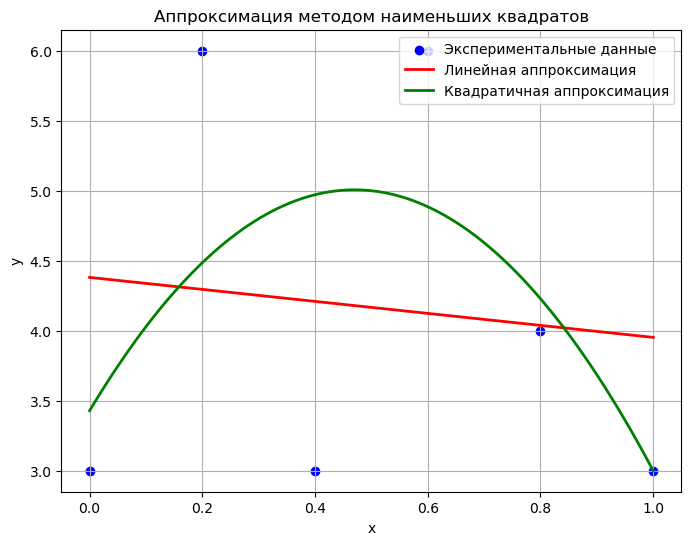


Таблица значений:
x = 0.0 | y = 3.0 | линейная = 4.4 | квадратичная = 3.4
x = 0.2 | y = 6.0 | линейная = 4.3 | квадратичная = 4.5
x = 0.4 | y = 3.0 | линейная = 4.2 | квадратичная = 5.0
x = 0.6 | y = 6.0 | линейная = 4.1 | квадратичная = 4.9
x = 0.8 | y = 4.0 | линейная = 4.0 | квадратичная = 4.2
x = 1.0 | y = 3.0 | линейная = 4.0 | квадратичная = 3.0
--------------------------------------------------
=== Вариант: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] ===
Линейная модель: y = 1.143x + 4.429
Квадратичная модель: y = 5.357x² + -4.214x + 5.143


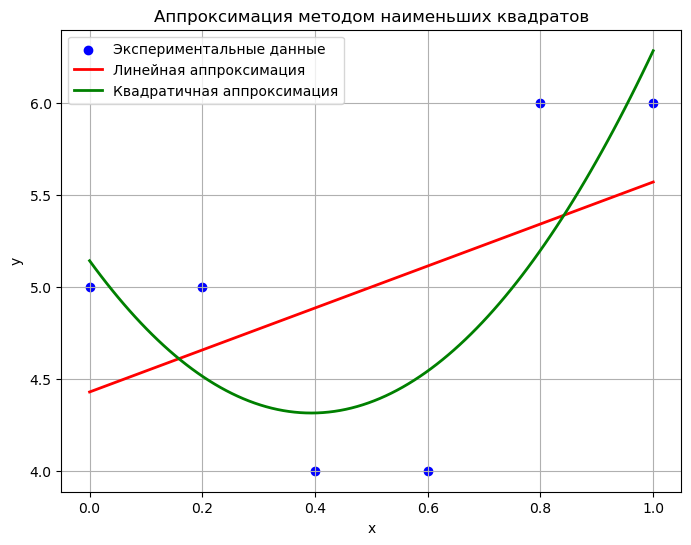


Таблица значений:
x = 0.0 | y = 5.0 | линейная = 4.4 | квадратичная = 5.1
x = 0.2 | y = 5.0 | линейная = 4.7 | квадратичная = 4.5
x = 0.4 | y = 4.0 | линейная = 4.9 | квадратичная = 4.3
x = 0.6 | y = 4.0 | линейная = 5.1 | квадратичная = 4.5
x = 0.8 | y = 6.0 | линейная = 5.3 | квадратичная = 5.2
x = 1.0 | y = 6.0 | линейная = 5.6 | квадратичная = 6.3
--------------------------------------------------
=== Вариант: [3.0, 3.2, 3.4, 3.6, 3.8, 4.0] ===
Линейная модель: y = 1.000x + -0.667
Квадратичная модель: y = 0.446x² + -2.125x + 4.750


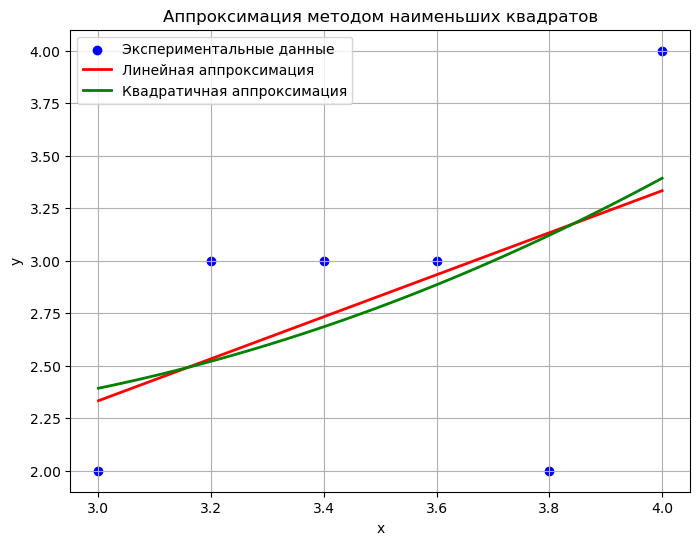


Таблица значений:
x = 3.0 | y = 2.0 | линейная = 2.3 | квадратичная = 2.4
x = 3.2 | y = 3.0 | линейная = 2.5 | квадратичная = 2.5
x = 3.4 | y = 3.0 | линейная = 2.7 | квадратичная = 2.7
x = 3.6 | y = 3.0 | линейная = 2.9 | квадратичная = 2.9
x = 3.8 | y = 2.0 | линейная = 3.1 | квадратичная = 3.1
x = 4.0 | y = 4.0 | линейная = 3.3 | квадратичная = 3.4
--------------------------------------------------
=== Вариант: [3.0, 3.2, 3.4, 3.6, 3.8, 4.0] ===
Линейная модель: y = -1.000x + 7.333
Квадратичная модель: y = 5.804x² + -41.625x + 77.750


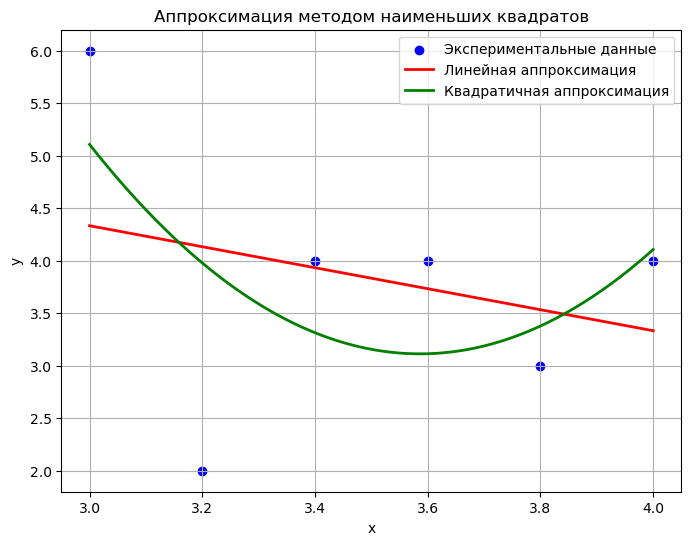


Таблица значений:
x = 3.0 | y = 6.0 | линейная = 4.3 | квадратичная = 5.1
x = 3.2 | y = 2.0 | линейная = 4.1 | квадратичная = 4.0
x = 3.4 | y = 4.0 | линейная = 3.9 | квадратичная = 3.3
x = 3.6 | y = 4.0 | линейная = 3.7 | квадратичная = 3.1
x = 3.8 | y = 3.0 | линейная = 3.5 | квадратичная = 3.4
x = 4.0 | y = 4.0 | линейная = 3.3 | квадратичная = 4.1
--------------------------------------------------
=== Вариант: [5.0, 5.2, 5.4, 5.6, 5.8, 6.0] ===
Линейная модель: y = 0.143x + 2.381
Квадратичная модель: y = -4.464x² + 49.250x + -132.143


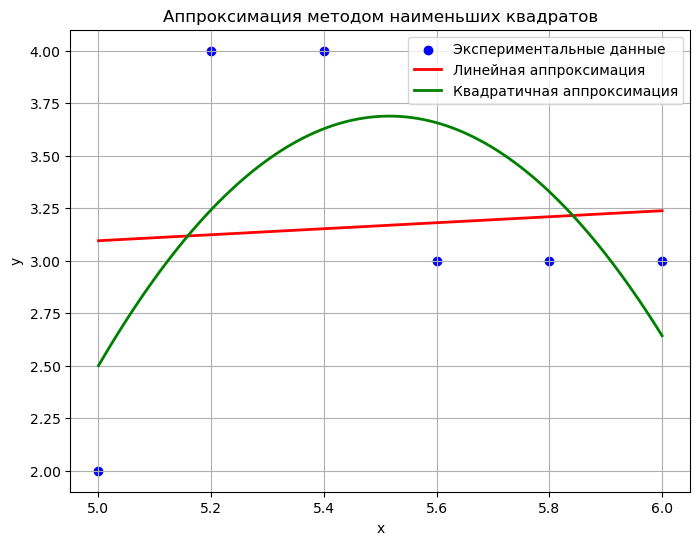


Таблица значений:
x = 5.0 | y = 2.0 | линейная = 3.1 | квадратичная = 2.5
x = 5.2 | y = 4.0 | линейная = 3.1 | квадратичная = 3.2
x = 5.4 | y = 4.0 | линейная = 3.2 | квадратичная = 3.6
x = 5.6 | y = 3.0 | линейная = 3.2 | квадратичная = 3.7
x = 5.8 | y = 3.0 | линейная = 3.2 | квадратичная = 3.3
x = 6.0 | y = 3.0 | линейная = 3.2 | квадратичная = 2.6
--------------------------------------------------
=== Вариант: [4.0, 4.2, 4.4, 4.6, 4.8, 5.0] ===
Линейная модель: y = 0.429x + 2.571
Квадратичная модель: y = -6.696x² + 60.696x + -132.250


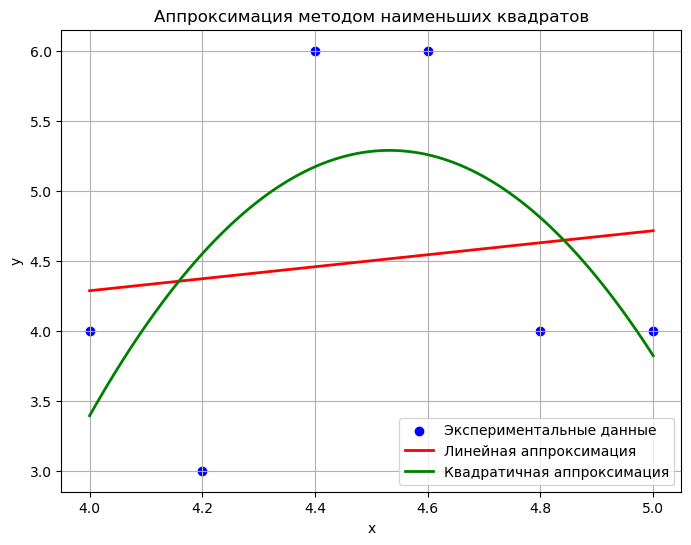


Таблица значений:
x = 4.0 | y = 4.0 | линейная = 4.3 | квадратичная = 3.4
x = 4.2 | y = 3.0 | линейная = 4.4 | квадратичная = 4.5
x = 4.4 | y = 6.0 | линейная = 4.5 | квадратичная = 5.2
x = 4.6 | y = 6.0 | линейная = 4.5 | квадратичная = 5.3
x = 4.8 | y = 4.0 | линейная = 4.6 | квадратичная = 4.8
x = 5.0 | y = 4.0 | линейная = 4.7 | квадратичная = 3.8
--------------------------------------------------
=== Вариант: [1.0, 1.2, 1.4, 1.6, 1.8, 2.0] ===
Линейная модель: y = 1.714x + 1.762
Квадратичная модель: y = -3.571x² + 12.429x + -5.857


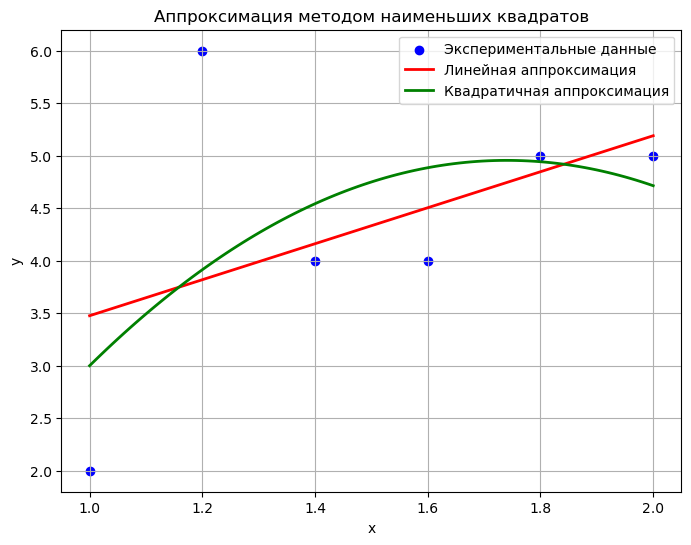


Таблица значений:
x = 1.0 | y = 2.0 | линейная = 3.5 | квадратичная = 3.0
x = 1.2 | y = 6.0 | линейная = 3.8 | квадратичная = 3.9
x = 1.4 | y = 4.0 | линейная = 4.2 | квадратичная = 4.5
x = 1.6 | y = 4.0 | линейная = 4.5 | квадратичная = 4.9
x = 1.8 | y = 5.0 | линейная = 4.8 | квадратичная = 4.9
x = 2.0 | y = 5.0 | линейная = 5.2 | квадратичная = 4.7
--------------------------------------------------
=== Вариант: [5.0, 5.2, 5.4, 5.6, 5.8, 6.0] ===
Линейная модель: y = -0.429x + 5.190
Квадратичная модель: y = -0.893x² + 9.393x + -21.714


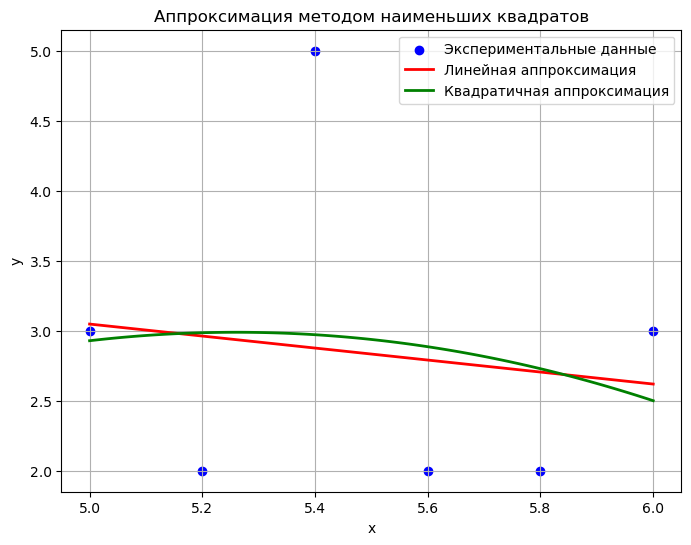


Таблица значений:
x = 5.0 | y = 3.0 | линейная = 3.0 | квадратичная = 2.9
x = 5.2 | y = 2.0 | линейная = 3.0 | квадратичная = 3.0
x = 5.4 | y = 5.0 | линейная = 2.9 | квадратичная = 3.0
x = 5.6 | y = 2.0 | линейная = 2.8 | квадратичная = 2.9
x = 5.8 | y = 2.0 | линейная = 2.7 | квадратичная = 2.7
x = 6.0 | y = 3.0 | линейная = 2.6 | квадратичная = 2.5
--------------------------------------------------
=== Вариант: [2.0, 2.2, 2.4, 2.6, 2.8, 3.0] ===
Линейная модель: y = -0.429x + 4.238
Квадратичная модель: y = -0.446x² + 1.804x + 1.500


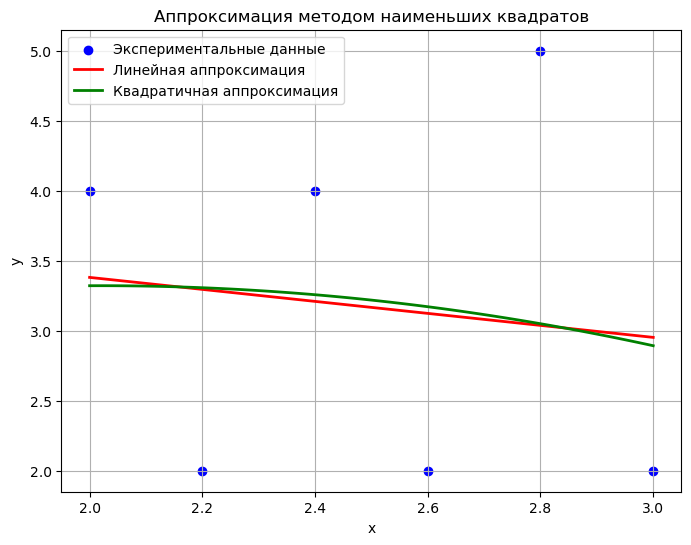


Таблица значений:
x = 2.0 | y = 4.0 | линейная = 3.4 | квадратичная = 3.3
x = 2.2 | y = 2.0 | линейная = 3.3 | квадратичная = 3.3
x = 2.4 | y = 4.0 | линейная = 3.2 | квадратичная = 3.3
x = 2.6 | y = 2.0 | линейная = 3.1 | квадратичная = 3.2
x = 2.8 | y = 5.0 | линейная = 3.0 | квадратичная = 3.1
x = 3.0 | y = 2.0 | линейная = 3.0 | квадратичная = 2.9
--------------------------------------------------
=== Вариант: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] ===
Линейная модель: y = -0.571x + 4.286
Квадратичная модель: y = 8.036x² + -8.607x + 5.357


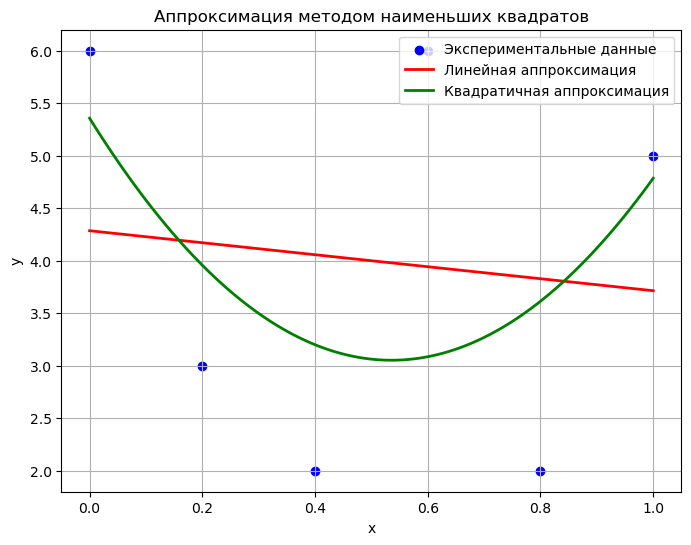


Таблица значений:
x = 0.0 | y = 6.0 | линейная = 4.3 | квадратичная = 5.4
x = 0.2 | y = 3.0 | линейная = 4.2 | квадратичная = 4.0
x = 0.4 | y = 2.0 | линейная = 4.1 | квадратичная = 3.2
x = 0.6 | y = 6.0 | линейная = 3.9 | квадратичная = 3.1
x = 0.8 | y = 2.0 | линейная = 3.8 | квадратичная = 3.6
x = 1.0 | y = 5.0 | линейная = 3.7 | квадратичная = 4.8
--------------------------------------------------


In [44]:
import numpy as np
import matplotlib.pyplot as plt

def solve_variant(x_data, y_data):
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    print(f"=== Вариант: {x_data.tolist()} ===")
    m_lin = np.vstack([x_data, np.ones(len(x_data))]).T
    a1, b1 = np.linalg.lstsq(m_lin, y_data, rcond=None)[0]
    m_quad = np.vstack([x_data**2, x_data, np.ones(len(x_data))]).T
    a2, b2, c2 = np.linalg.lstsq(m_quad, y_data, rcond=None)[0]
    print("Линейная модель: y =", f"{a1:.3f}x + {b1:.3f}")
    print("Квадратичная модель: y =", f"{a2:.3f}x² + {b2:.3f}x + {c2:.3f}")
    x_plot = np.linspace(min(x_data), max(x_data), 100)
    y_lin = a1 * x_plot + b1
    y_quad = a2 * x_plot**2 + b2 * x_plot + c2
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, color='blue', label='Экспериментальные данные')
    plt.plot(x_plot, y_lin, 'r-', lw=2, label='Линейная аппроксимация')
    plt.plot(x_plot, y_quad, 'g-', lw=2, label='Квадратичная аппроксимация')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Аппроксимация методом наименьших квадратов')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\nТаблица значений:")
    for i in range(len(x_data)):
        y_pred_lin = a1 * x_data[i] + b1
        y_pred_quad = a2 * x_data[i]**2 + b2 * x_data[i] + c2
        print(f"x = {x_data[i]:.1f} | y = {y_data[i]:.1f} | линейная = {y_pred_lin:.1f} | квадратичная = {y_pred_quad:.1f}")
    print("-" * 50)

variants = [
    ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [3.0, 6.0, 3.0, 6.0, 4.0, 3.0]),  # Вариант 1
    ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [5.0, 5.0, 4.0, 4.0, 6.0, 6.0]),  # Вариант 2
    ([3.0, 3.2, 3.4, 3.6, 3.8, 4.0], [2.0, 3.0, 3.0, 3.0, 2.0, 4.0]),  # Вариант 3
    ([3.0, 3.2, 3.4, 3.6, 3.8, 4.0], [6.0, 2.0, 4.0, 4.0, 3.0, 4.0]),  # Вариант 4
    ([5.0, 5.2, 5.4, 5.6, 5.8, 6.0], [2.0, 4.0, 4.0, 3.0, 3.0, 3.0]),  # Вариант 5
    ([4.0, 4.2, 4.4, 4.6, 4.8, 5.0], [4.0, 3.0, 6.0, 6.0, 4.0, 4.0]),  # Вариант 6
    ([1.0, 1.2, 1.4, 1.6, 1.8, 2.0], [2.0, 6.0, 4.0, 4.0, 5.0, 5.0]),  # Вариант 7
    ([5.0, 5.2, 5.4, 5.6, 5.8, 6.0], [3.0, 2.0, 5.0, 2.0, 2.0, 3.0]),  # Вариант 8
    ([2.0, 2.2, 2.4, 2.6, 2.8, 3.0], [4.0, 2.0, 4.0, 2.0, 5.0, 2.0]),  # Вариант 9
    ([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [6.0, 3.0, 2.0, 6.0, 2.0, 5.0])   # Вариант 10
]

for i, (x, y) in enumerate(variants, 1):
    solve_variant(x, y)